# Behavoir of adavance time in driplines using hydraulic simulation by Python to increase the accuracy during the fertirrigation  

### By Gregory Guevara. Earth University 
#### January 2024

### Objective: To understand the behavoir and mathematical equations to describe the advance time in drip lines during fertigation process, using the hydraulic models for pressurized system by Python 

### first stage we introduce the phenomeno and create an algorith for calculate the travel time for specific inputs.

In [1]:

import math 
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sb

In [2]:
# inputs
q= 1 #flow l/h
S=0.5   #spacing between drippers 
L=150     #lenght of dripline 
dia=20.2  # internal diameter      

In [3]:

df=pd.DataFrame()
df["outlets"]=0
df["long_acum"]=0
df["q_tramo"]=0

df["v_tramo"]=0
df["t_tramo"]=0
df["t_acum"]=0
df["headloss"]=0
df["HL_acum"]=0


outlets=L/S
Q=outlets*q
qq=Q+q
a=range(1,int(outlets)+1)
ss=0
Area= 3.141516*(dia/2000)**2
for x in a: 
    qq=qq-q # decrease the flow for each outlet
    ss=ss+S #step for outlets index 
    df.at[x,'outlets']=x # column of N of outlets 
    df.at[x,'long_acum']=ss # column for acumulated lenght 
    df.at[x,'q_tramo']=qq
#calculating the travel time   
df["v_tramo"]=df["q_tramo"]/Area/3600/1000
df["t_tramo"]=S/df["v_tramo"]
df["t_acum"]=df['t_tramo'].cumsum()/60
travel_time= round(df["t_tramo"].sum()/60,)
aa=int(outlets*.95)
travel_time_95=round(df.loc[aa,'t_acum'],4)
#calculating the headloss 
df["headloss"]= 1.131*10**9*(df["q_tramo"]/1000/140)**1.852*S*dia**-4.872
HF=round(df["headloss"].sum(),2)
df["HL_acum"]=df['headloss'].cumsum()

#outputs 
print ("The travel time in 100% of lenght: " + str(travel_time) + " minutes")
print ("The travel time in 95% of lenght:  " + str(travel_time_95) + " minutes")
print ("The total head loss:  " + str(HF) + " m")
print (df.head())
print (df.describe())
df.to_csv('salida_basic.csv')


The travel time in 100% of lenght: 60 minutes
The travel time in 95% of lenght:  28.5 minutes
The total head loss:  0.3 m
   outlets  long_acum  q_tramo   v_tramo   t_tramo    t_acum  headloss  \
1      1.0        0.5    300.0  0.260038  1.922796  0.032047  0.002817   
2      2.0        1.0    299.0  0.259171  1.929227  0.064200  0.002799   
3      3.0        1.5    298.0  0.258304  1.935701  0.096462  0.002782   
4      4.0        2.0    297.0  0.257438  1.942218  0.128832  0.002765   
5      5.0        2.5    296.0  0.256571  1.948780  0.161312  0.002748   

    HL_acum  
1  0.002817  
2  0.005616  
3  0.008398  
4  0.011163  
5  0.013911  
          outlets   long_acum     q_tramo     v_tramo     t_tramo      t_acum  \
count  300.000000  300.000000  300.000000  300.000000  300.000000  300.000000   
mean   150.500000   75.250000  150.500000    0.130452   12.080283    9.613981   
std     86.746758   43.373379   86.746758    0.075191   40.993237    9.528674   
min      1.000000    0.50

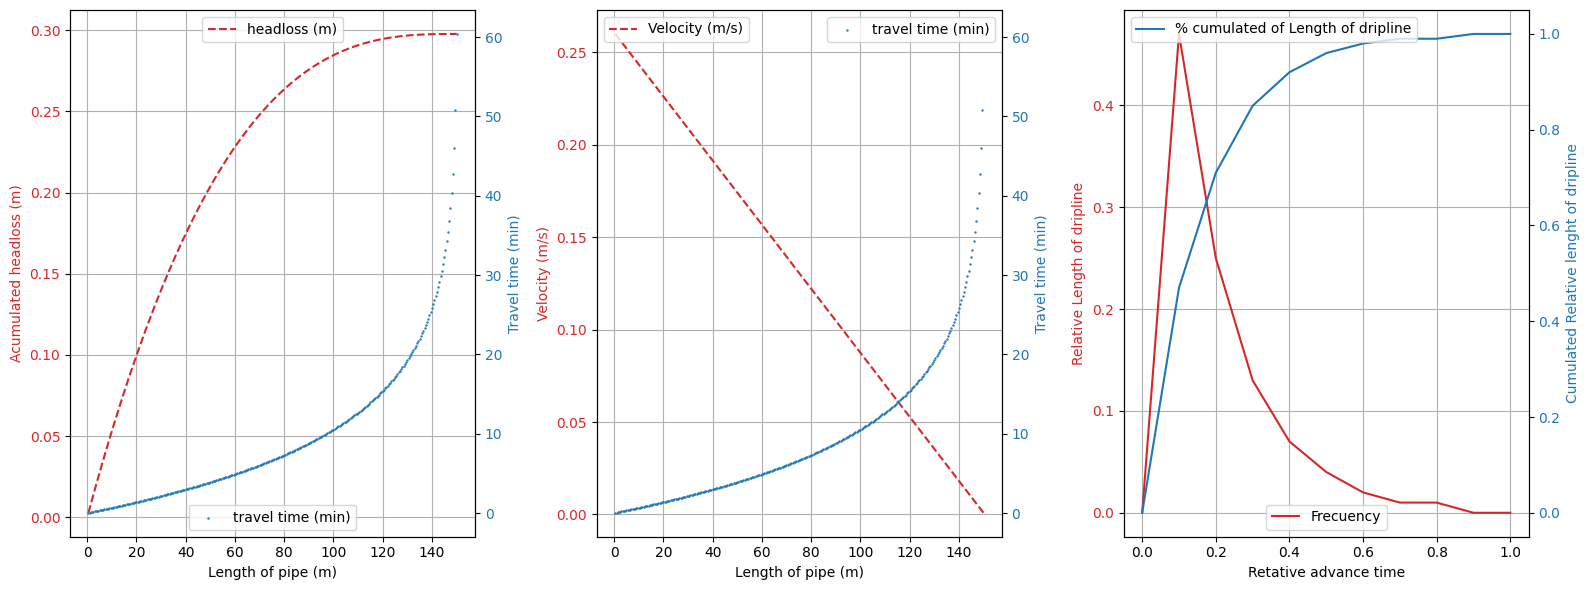

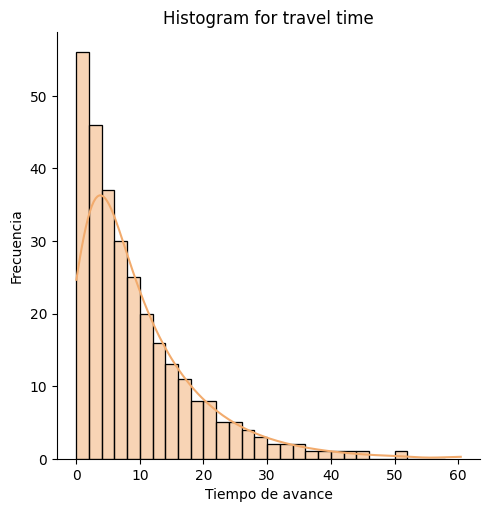

In [4]:
## graphs for the phenomeno 

fig =plt.figure(figsize=(16,6))

ax1 = fig.add_subplot(131)
ax1.grid(True)
color = 'tab:red'
ax1.set_xlabel('Length of pipe (m)')
ax1.set_ylabel('Acumulated headloss (m)', color=color)
ax1.plot(df['long_acum'], df['HL_acum'], color=color,
        label="headloss (m)",linestyle='--')
ax1.legend(loc="upper center")
ax1.tick_params(axis='y', labelcolor=color)
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:blue'
ax2.set_ylabel('Travel time (min)', color=color)  # we already handled the x-label with ax1
ax2.scatter(df['long_acum'],df['t_acum'], color=color,s=0.5,label="travel time (min)")
ax2.tick_params(axis='y', labelcolor=color)
ax2.legend(loc="lower center")


ax1 = fig.add_subplot(132)
ax1.grid(True)
color = 'tab:red'
ax1.set_xlabel('Length of pipe (m)')
ax1.set_ylabel('Velocity (m/s)', color=color)
ax1.plot(df['long_acum'], df['v_tramo'], color=color,
        label="Velocity (m/s)",linestyle='--')
ax1.tick_params(axis='y', labelcolor=color)
ax1.legend(loc="upper left")
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:blue'
ax2.set_ylabel('Travel time (min)', color=color)  # we already handled the x-label with ax1
ax2.scatter(df['long_acum'],df['t_acum'], color=color,s=0.5,label="travel time (min)")
ax2.tick_params(axis='y', labelcolor=color)
ax2.legend(loc="upper right")

a=[0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.00]
b=[0.00,0.47,0.25,0.13,0.07,0.04,0.02,0.01,0.01,0.00,0.00]
c=[0,0.47,0.71,0.85,0.92,0.96,0.98,0.99,0.99,1,1]
ax1 = fig.add_subplot(133)
ax1.grid(True)
color = 'tab:red'
ax1.set_xlabel('Retative advance time')
ax1.set_ylabel('Relative Length of dripline', color=color)
ax1.plot(a, b, color=color,
        label="Frecuency")
ax1.tick_params(axis='y', labelcolor=color)
ax1.legend(loc="lower center")
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:blue'
ax2.set_ylabel('Cumulated Relative lenght of dripline', color=color)  # we already handled the x-label with ax1
ax2.plot(a,c, color=color,label="% cumulated of Length of dripline")
ax2.tick_params(axis='y', labelcolor=color)
ax2.legend(loc="upper left")

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()


fin= int(max(df['t_acum']))
intervalos = range(0,fin,2)
sb.displot(df['t_acum'], color='#F2AB6D', bins=intervalos, kde=True) #creamos el gráfico en Seaborn
#configuramos en Matplotlib
plt.ylabel('Frecuencia')
plt.xlabel('Tiempo de avance')
plt.title('Histogram for travel time')

plt.show()

### Graph analysis for differents flows in driplines 

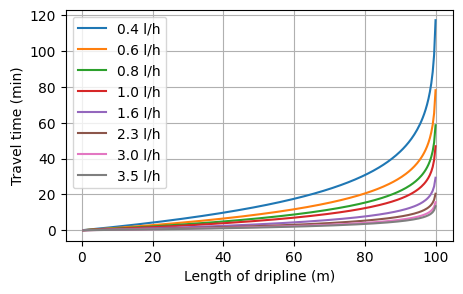

In [5]:
# inputs
dia=20.2
Area= 3.141516*(dia/2000)**2
item=1
S=0.4
flows=[0.4,0.6,0.8,1.0,1.6,2.3,3.0,3.5]
L=100
outlets=L/S

fig, ax1 = plt.subplots(figsize=(5,3))
ax1.grid(True)
ax1.set_xlabel('Length of dripline (m)')
ax1.set_ylabel('Travel time (min)')
#ax1.set_title('Efect in travel time by diferent flow of dripper')

for fls in flows: # testing a range of typical dripper flows 
    q=fls
    Q=outlets*q
    qq=Q+q
    a=range(1,int(outlets)+1)
    df1=pd.DataFrame()
    df1["outlets"]=0
    df1["long_acum"]=0
    df1["q_tramo"]=0
    df1["v_tramo"]=0
    df1["t_tramo"]=0
    df1["t_tramo_acum"]=0
    ss=0
    
    for x in a: 
        qq=qq-q # decrease the flow for each outlets
        ss=ss+S #step for outlet index
        df1.at[x,'outlets']=x # column N outles "
        df1.at[x,'long_acum']=ss # column acumulate lenght"
        df1.at[x,'q_tramo']=qq
    #calculating the travel time   
    df1["v_tramo"]=df1["q_tramo"]/Area/3600/1000
    df1["t_tramo"]=S/df1["v_tramo"]
    df1["t_tramo_acum"]=df1['t_tramo'].cumsum()/60
    travel_time= round(df1["t_tramo"].sum()/60,2)
    aa=int(outlets*.95)
    travel_time_95=df1.loc[aa,'t_tramo_acum']
    #calculating the velocity 
    max_vel=Q/Area/1000/3600
    #calculating the headloss 
    df1["headloss"]= 1.131*10**9*(df["q_tramo"]/1000/140)**1.852*S*dia**-4.872
    HF=round(df["headloss"].sum(),2)

    rect1= ax1.plot(df1['long_acum'], df1['t_tramo_acum'], 
            label=str(q)+" l/h",linestyle='-')
    ax1.tick_params(axis='y')
    ax1.legend()
plt.show()
        

### simulator for multiples variables 

In [6]:
dfout=pd.DataFrame()
dfout["item"]=0
dfout["flow"]=0
dfout["spacing"]=0
dfout["lenght"]=0
dfout["diameter"]=0
dfout["fulltime"]=0
dfout["time95"]=0
dfout["velocity"]=0
dfout["headloss"]=0



ss=0
diameter=[13.6,16.2,22.2]
item=1
spacing= [0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
flows=[0.4,0.6,0.8,1.0,1.6,2.3,3,3.5]
length=[20,40,80,120,160,200,250,300]
for diam in diameter:
    dia=diam
    Area= 3.141516*(dia/2000)**2
    for ln in length: #testing a range of lenghts 
        L=ln
        for fls in flows: # testing a range of typical dripper flows 
            q=fls
            for sp in spacing: #testing dripper spacing by 10 cm 
                S=sp
                outlets=L/S
                Q=outlets*q
                qq=Q+q
                a=range(1,int(outlets)+1)
                df1=pd.DataFrame()
                df1["outlets"]=0
                df1["long_acum"]=0
                df1["q_tramo"]=0
                df1["v_tramo"]=0
                df1["t_tramo"]=0
                df1["t_tramo_acum"]=0
                for x in a: 
                    qq=qq-q # decrease the flow for each outlets
                    ss=ss+S #step for outlet index
                    df1.at[x,'outlets']=x # column N outles "
                    df1.at[x,'long_acum']=ss # column acumulate lenght"
                    df1.at[x,'q_tramo']=qq
                #calculating the travel time   
                df1["v_tramo"]=df1["q_tramo"]/Area/3600/1000
                df1["t_tramo"]=S/df1["v_tramo"]
                df1["t_tramo_acum"]=df1['t_tramo'].cumsum()/60
                travel_time= round(df1["t_tramo"].sum()/60,2)
                aa=int(outlets*.95)
                travel_time_95=df1.loc[aa,'t_tramo_acum']
                #calculating the velocity 
                max_vel=Q/Area/1000/3600
                #calculating the headloss 
                df["headloss"]= 1.131*10**9*(df["q_tramo"]/1000/140)**1.852*S*dia**-4.872
                HF=round(df["headloss"].sum(),2)

                #outputs 
                dfout.at[item,'item']=item
                dfout.at[item,'flow']=q
                dfout.at[item,'spacing']=S
                dfout.at[item,'diameter']=dia
                dfout.at[item,'length']=L
                dfout.at[item,'fulltime']=travel_time
                dfout.at[item,'time95']=travel_time_95
                dfout.at[item,'velocity']=max_vel
                dfout.at[item,'headloss']=HF
                
                item+=1
print (dfout)

        

KeyboardInterrupt: 

In [ ]:
dfout.to_csv('salida.csv')


### Next we compare the results of the simulation and identify the relationships between the factors


#### machine learning for multiple lineal regression using scikit learn for all parameter

### lineal regression, separated by factor 

*********************************************
*********************************************
r2 =  0.3747491047151128
Variance score: 0.37
Coefficients:  [[-13.00901293]]
Intercept:  [44.89355192]


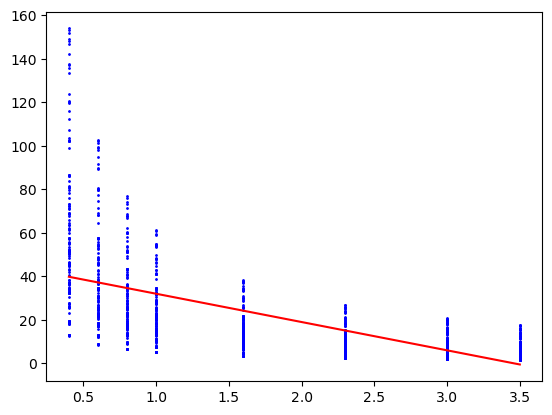

In [47]:
from sklearn import linear_model
# by flow
cdf = dfout[['flow','time95']]
msk = np.random.rand(len(dfout)) < 0.8
train = cdf[msk]
test= cdf[~msk]
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['flow']])
train_y = np.asanyarray(train[['time95']])
regr.fit (train_x, train_y)
from sklearn.metrics import r2_score
test_x = np.asanyarray(test[['flow']])
test_y = np.asanyarray(test[['time95']])
test_y_ = regr.predict(test_x)
# The coefficients
print ("*********************************************")
print ("*********************************************")
r2=r2_score(test_y , test_y_) 
print ('r2 = ', r2)
print('Variance score: %.2f' % regr.score(test_x, test_y))
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)
# Plot outputs
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.scatter(train.flow, train.time95,  color='blue',s=1)

*********************************************
*********************************************
r2 =  -0.008351151201939189
Variance score: -0.01
Coefficients:  [[0.01083118]]
Intercept:  [22.30102456]


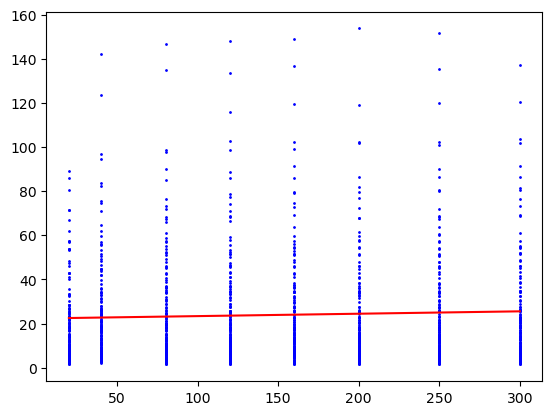

In [51]:
# by lenght
cdf = dfout[['length','time95']]
msk = np.random.rand(len(dfout)) < 0.8
train = cdf[msk]
test= cdf[~msk]
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['length']])
train_y = np.asanyarray(train[['time95']])
regr.fit (train_x, train_y)
from sklearn.metrics import r2_score
test_x = np.asanyarray(test[['length']])
test_y = np.asanyarray(test[['time95']])
test_y_ = regr.predict(test_x)
# The coefficients
print ("*********************************************")
print ("*********************************************")
r2=r2_score(test_y , test_y_) 
print ('r2 = ', r2)
print('Variance score: %.2f' % regr.score(test_x, test_y))
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)
# Plot outputs
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.scatter(train.length, train.time95,  color='blue',s=1)

*********************************************
*********************************************
r2 =  0.14078040102549016
Variance score: 0.14
Coefficients:  [[41.8592261]]
Intercept:  [1.05419794]


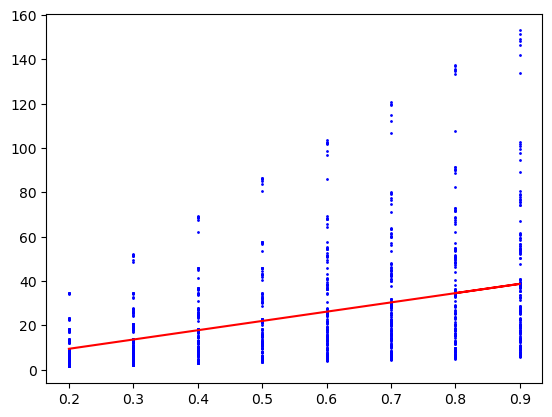

In [52]:

# by spacing
cdf = dfout[['spacing','time95']]
msk = np.random.rand(len(dfout)) < 0.8
train = cdf[msk]
test= cdf[~msk]
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['spacing']])
train_y = np.asanyarray(train[['time95']])
regr.fit (train_x, train_y)
from sklearn.metrics import r2_score
test_x = np.asanyarray(test[['spacing']])
test_y = np.asanyarray(test[['time95']])
test_y_ = regr.predict(test_x)
# The coefficients
print ("*********************************************")
print ("*********************************************")
r2=r2_score(test_y , test_y_) 
print ('r2 = ', r2)
print('Variance score: %.2f' % regr.score(test_x, test_y))
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)
# Plot outputs
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.scatter(train.spacing, train.time95,  color='blue',s=1)

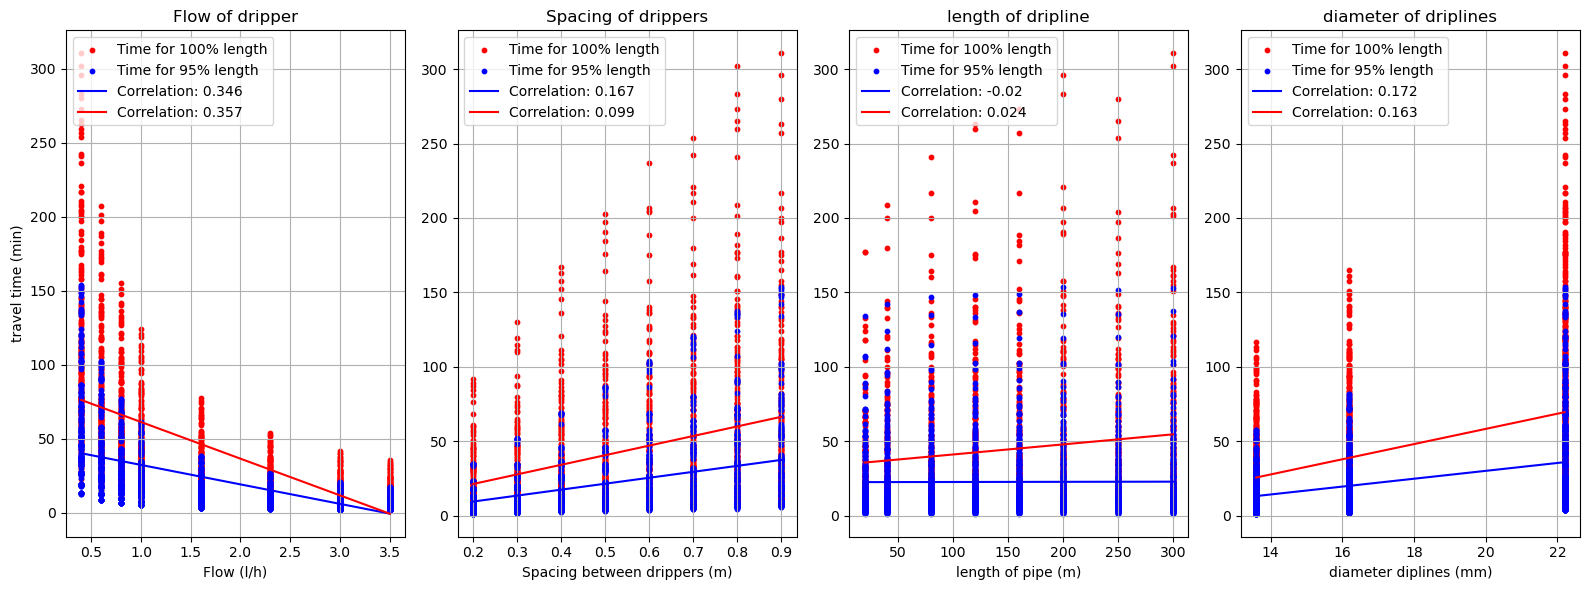

In [80]:
fig = plt.figure(figsize=(16,6))

## by flow #######################

#regression for time 95%
cdf = dfout[['flow','time95']]
msk = np.random.rand(len(dfout)) < 0.8
train = cdf[msk]
test= cdf[~msk]
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['flow']])
train_y = np.asanyarray(train[['time95']])
regr.fit (train_x, train_y)
from sklearn.metrics import r2_score
test_x = np.asanyarray(test[['flow']])
test_y = np.asanyarray(test[['time95']])
test_y_ = regr.predict(test_x)
r2=round(r2_score(test_y , test_y_),3) 

marker_size = 10
plot1 = fig.add_subplot(141)
a1=plt.scatter(dfout['flow'], dfout['fulltime'],color='red',s=10,label="Time for 100% length")
b1=plt.scatter(dfout['flow'], dfout['time95'],color='blue',s=10,label="Time for 95% length")
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-b', label="Correlation: "+str(r2))

#regression for full time
cdf = dfout[['flow','fulltime']]
msk = np.random.rand(len(dfout)) < 0.8
train = cdf[msk]
test= cdf[~msk]
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['flow']])
train_y = np.asanyarray(train[['fulltime']])
regr.fit (train_x, train_y)
from sklearn.metrics import r2_score
test_x = np.asanyarray(test[['flow']])
test_y = np.asanyarray(test[['fulltime']])
test_y_ = regr.predict(test_x)
r2=round(r2_score(test_y , test_y_),3) 
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r', label="Correlation: "+str(r2))

plt.grid(True)
plt.xlabel('Flow (l/h)')
plt.ylabel('travel time (min)')
plt.title('Flow of dripper')
plt.legend(loc="upper left")

#****************************************

#****************************************
# by spacing##############

#regression for time 95%
cdf = dfout[['spacing','time95']]
msk = np.random.rand(len(dfout)) < 0.8
train = cdf[msk]
test= cdf[~msk]
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['spacing']])
train_y = np.asanyarray(train[['time95']])
regr.fit (train_x, train_y)
from sklearn.metrics import r2_score
test_x = np.asanyarray(test[['spacing']])
test_y = np.asanyarray(test[['time95']])
test_y_ = regr.predict(test_x)
r2=round(r2_score(test_y , test_y_),3) 

marker_size = 50
plot3 = fig.add_subplot(142)
a3=plt.scatter(dfout['spacing'], dfout['fulltime'],color='red',s=10,label="Time for 100% length")
b3=plt.scatter(dfout['spacing'], dfout['time95'],color='blue',s=10,label="Time for 95% length")
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-b', label="Correlation: "+str(r2))

#regression for full time
cdf = dfout[['spacing','fulltime']]
msk = np.random.rand(len(dfout)) < 0.8
train = cdf[msk]
test= cdf[~msk]
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['spacing']])
train_y = np.asanyarray(train[['fulltime']])
regr.fit (train_x, train_y)
from sklearn.metrics import r2_score
test_x = np.asanyarray(test[['spacing']])
test_y = np.asanyarray(test[['fulltime']])
test_y_ = regr.predict(test_x)
r2=round(r2_score(test_y , test_y_),3) 
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r', label="Correlation: "+str(r2))

plt.grid(True)
plt.xlabel('Spacing between drippers (m)')
plt.title('Spacing of drippers')
plt.legend(loc="upper left")



# by lenght ##########################

#regression for time 95%
cdf = dfout[['length','time95']]
msk = np.random.rand(len(dfout)) < 0.8
train = cdf[msk]
test= cdf[~msk]
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['length']])
train_y = np.asanyarray(train[['time95']])
regr.fit (train_x, train_y)
from sklearn.metrics import r2_score
test_x = np.asanyarray(test[['length']])
test_y = np.asanyarray(test[['time95']])
test_y_ = regr.predict(test_x)
r2=round(r2_score(test_y , test_y_),3) 

marker_size = 50
plot2 = fig.add_subplot(143)
a2=plt.scatter(dfout['length'], dfout['fulltime'],color='red',s=10,label="Time for 100% length")
b2=plt.scatter(dfout['length'], dfout['time95'],color='blue',s=10,label="Time for 95% length")
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-b',label="Correlation: "+str(r2))

#regression for full time
cdf = dfout[['length','fulltime']]
msk = np.random.rand(len(dfout)) < 0.8
train = cdf[msk]
test= cdf[~msk]
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['length']])
train_y = np.asanyarray(train[['fulltime']])
regr.fit (train_x, train_y)
from sklearn.metrics import r2_score
test_x = np.asanyarray(test[['length']])
test_y = np.asanyarray(test[['fulltime']])
test_y_ = regr.predict(test_x)
r2=round(r2_score(test_y , test_y_),3)

plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r', label="Correlation: "+str(r2))

plt.grid(True)
plt.xlabel('length of pipe (m)')
plt.title('length of dripline')
plt.legend()

#****************************************
# by dimeter ##############

#regression for time 95%
cdf = dfout[['diameter','time95']]
msk = np.random.rand(len(dfout)) < 0.8
train = cdf[msk]
test= cdf[~msk]
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['diameter']])
train_y = np.asanyarray(train[['time95']])
regr.fit (train_x, train_y)
from sklearn.metrics import r2_score
test_x = np.asanyarray(test[['diameter']])
test_y = np.asanyarray(test[['time95']])
test_y_ = regr.predict(test_x)
r2=round(r2_score(test_y , test_y_),3) 

marker_size = 50
plot3 = fig.add_subplot(144)
a3=plt.scatter(dfout['diameter'], dfout['fulltime'],color='red',s=10,label="Time for 100% length")
b3=plt.scatter(dfout['diameter'], dfout['time95'],color='blue',s=10,label="Time for 95% length")
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-b', label="Correlation: "+str(r2))

#regression for full time
cdf = dfout[['diameter','fulltime']]
msk = np.random.rand(len(dfout)) < 0.8
train = cdf[msk]
test= cdf[~msk]
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['diameter']])
train_y = np.asanyarray(train[['fulltime']])
regr.fit (train_x, train_y)
from sklearn.metrics import r2_score
test_x = np.asanyarray(test[['diameter']])
test_y = np.asanyarray(test[['fulltime']])
test_y_ = regr.predict(test_x)
r2=round(r2_score(test_y , test_y_),3) 
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r', label="Correlation: "+str(r2))

plt.grid(True)
plt.xlabel('diameter diplines (mm)')
plt.title('diameter of driplines')
plt.legend(loc="upper left")


fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

## non lineal regression for multivariable factors 
https://stackoverflow.com/questions/3433486/how-to-do-exponential-and-logarithmic-curve-fitting-in-python-i-found-only-poly

In [55]:

df=dfout
print ("******************************")
print("Valores faltantes o NaN, en porcentajes:\n",(df.isnull().sum()/df.shape[0])*100)
df.describe()

******************************
Valores faltantes o NaN, en porcentajes:
 item          0.0
flow          0.0
spacing       0.0
lenght      100.0
diameter      0.0
fulltime      0.0
time95        0.0
velocity      0.0
headloss      0.0
length        0.0
dtype: float64


,item,flow,spacing,lenght,diameter,fulltime,time95,velocity,headloss,length
count,1536.000000,1536.000000,1536.000000,0.0,1536.000000,1536.000000,1536.000000,1536.000000,1536.000000,1536.000000
mean,768.500000,1.650000,0.550000,NaN,17.333333,44.874993,23.548327,0.731462,1.139167,146.250000
std,443.549321,1.088932,0.229203,NaN,3.602407,45.480520,24.288070,1.024809,1.029266,93.429763
min,1.000000,0.400000,0.200000,NaN,13.600000,2.580000,1.446350,0.006379,0.080000,20.000000
25%,384.750000,0.750000,0.375000,NaN,13.600000,14.522500,7.392005,0.143530,0.290000,70.000000
50%,768.500000,1.300000,0.550000,NaN,16.200000,29.075000,14.985277,0.359382,0.845000,140.000000
75%,1152.250000,2.475000,0.725000,NaN,22.200000,58.272500,30.642673,0.881643,1.587500,212.500000
max,1536.000000,3.500000,0.900000,NaN,22.200000,310.530000,153.842743,10.039214,3.680000,300.000000


Initial Objective: 1536.0


Final Objective: 5.429238925824491
Solution
A = 0.0912
B = -1.0
C = 0.7824
D = 0.1928
E = 1.9999
R^2 correlation = 0.9933


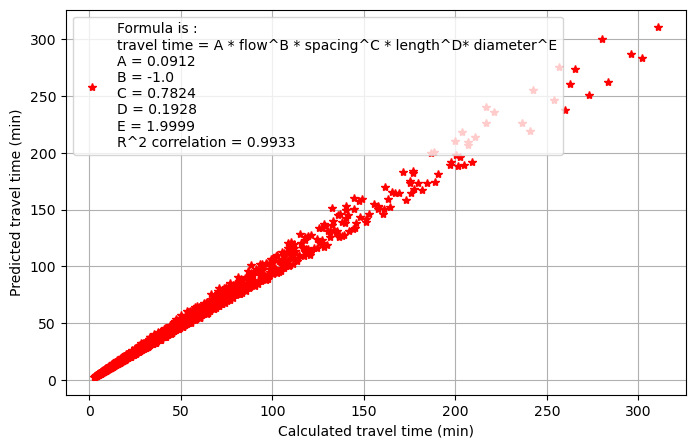

In [56]:
from scipy.optimize import minimize
xm1 = np.array(dfout["flow"])  # flow_ dataframe to array 
xm2 = np.array(dfout["spacing"])   # spacing
xm3 = np.array(dfout["length"])  # lenght 
xm4 = np.array(dfout["diameter"])
ym = np.array(dfout["fulltime"])  # output for time_95%

# calculate y
def calc_y(x):
    a = x[0]
    b = x[1]
    c = x[2]
    d = x[3]
    e = x[4]
    #y = a * xm1 + b  # linear regression
    y = a * ( xm1 ** b ) * ( xm2 ** c ) * ( xm3 ** d )*(  xm4 ** e)
    return y

# define objective
def objective(x):
    # calculate y
    y = calc_y(x)
    # calculate objective
    obj = 0.0
    for i in range(len(ym)):
        obj = obj + ((y[i]-ym[i])/ym[i])**2    
    # return result
    return obj

# initial guesses
x0 = np.zeros(5)
x0[0] = 0.0 # a
x0[1] = 0.0 # b
x0[2] = 0.0 # c
x0[3] = 0.0 # d
x0[4] = 0.0 # e


# show initial objective
print('Initial Objective: ' + str(objective(x0)))

# optimize
# bounds on variables
my_bnds = (-100.0, 100.0)
bnds = (my_bnds, my_bnds, my_bnds, my_bnds, my_bnds)
solution = minimize(objective, x0, method='SLSQP',bounds=bnds)
x = solution.x
y = calc_y(x)

# show final objective
cObjective = 'Final Objective: ' + str(objective(x))
print(cObjective)

# print solution
print('Solution')
cA = 'A = ' + str(round(x[0],4))
print(cA)
cB = 'B = ' + str(round(x[1],4))
print(cB)
cC = 'C = ' + str(round(x[2],4))
print(cC)
cD = 'D = ' + str(round(x[3],4))
print(cD)
cE = 'E = ' + str(round(x[4],4))
print(cE)

#ym measured outcome
#y  predicted outcome
from scipy import stats
slope, intercept, r_value, p_value, std_err = stats.linregress(ym,y)
r2 = round(r_value**2,4)
cR2 = "R^2 correlation = " + str(round(r_value**2,4))
print(cR2)

cFormula = "Formula is : " + "\n" \
           + "travel time = A * flow^B * spacing^C * length^D* diameter^E"
cLegend = cFormula + "\n" + cA + "\n" + cB + "\n" \
           + cC + "\n" + cD + "\n"+ cE + "\n" + cR2

# plot solution
plt.figure(figsize=(8,5))
#plt.title('Calculated travel time versus Predicted  Outcomes For Non-Linear Regression')
plt.plot(ym,y,'r*')
plt.xlabel('Calculated travel time (min)')
plt.ylabel('Predicted travel time (min)')
plt.legend([cLegend])
plt.grid(True)

plt.show()

# Aprendizaje Supervisado

##Paso 1. Definicion de funciones para poder analizar el DataSet con diferentes enfoques usando varios metodos


In [57]:

#Funcion para division de Datos para Training and Testing
def Data_Segregation(features,targets, x=5, verification = False,split=0.5):
  from sklearn.model_selection import train_test_split
  X_train, X_test, y_train, y_test = train_test_split(features,targets, random_state=x, test_size=split) 

  #Verificamos los tamaños:
  if verification:
    print("Segregation verification, sizes:")
    print("X_train= ",X_train.shape)
    print("X_test= ",X_test.shape)
    print("y_train= ",y_train.shape)
    print("y_test= ",y_test.shape)

  return X_train, X_test, y_train, y_test


Paso 2. Seleccion de columnas, division de los datos para entrenamiento y prueba, y definicion de Casos.
Caso... Se usaran las demas caracteristicas, excluyendo fulltime, para poder predecirlo

Features: 'flow','spacing','lenght','diameter'
Targets: 'fulltime'

In [58]:
#Seleccioamos solo las columnas a usar
#Se excluye temperatura minima, basado en resultados del pre-procesado

cols_to_use = ['flow','spacing','length','diameter','fulltime']
df = df[cols_to_use]
df.shape
#Definicion de features o targets, segun caso

features = df[['flow','spacing','length','diameter']]
targets = df['fulltime']


In [59]:
#Uso de funcion Data_Segregation, con un random_state de 13 y la visualizacion de tamanos activa, 0.75 para el tamaño del split
X_train, X_test, y_train, y_test = Data_Segregation (features,targets, 13, True,0.7)

Segregation verification, sizes:
X_train=  (460, 4)
X_test=  (1076, 4)
y_train=  (460,)
y_test=  (1076,)


## Funciones para correr algoritmos de ML

In [60]:

#Funcion para correr un modelo lineal 
def Linear_Regression(X_train, X_test, y_train, y_test, showScore = False, positiveBool=False):
  from sklearn.linear_model import LinearRegression
  lr=LinearRegression(positive = positiveBool).fit(X_train,y_train)

  trainScore = lr.score(X_train,y_train)
  testScore = lr.score(X_test,y_test)                      
  if showScore:
    print("Train score= ", trainScore)
    print("Test score= ", testScore)
  
  return trainScore, testScore



In [61]:
#Funcion para correr modelo lineal Ridge
def LRRidge(X_train, X_test, y_train, y_test, showScore = False, positiveBool=False, alphaNum = 1.0):
  from sklearn import linear_model
  reg = linear_model.Ridge(alpha=alphaNum, positive = positiveBool).fit(X_train,y_train)
  
  trainScore = reg.score(X_train,y_train)
  testScore = reg.score(X_test,y_test)                      
  if showScore:
    print("Train score= ", trainScore)
    print("Test score= ", testScore)
  
  return trainScore, testScore

In [62]:
#Funcion para correr SVM
def SVMachine(X_train, X_test, y_train, y_test, showScore = False, kernelStr="rbf", Creg=1.0, gammaStr="scale"):
  from sklearn.svm import SVR
  LinearSVR = SVR(kernel = kernelStr, C = Creg, gamma = gammaStr)

  #svr=LinearSVR().fit(X_train,y_train)
  LinearSVR.fit(X_train,y_train)

  trainScore = LinearSVR.score(X_train,y_train)
  testScore = LinearSVR.score(X_test,y_test)    

  if showScore:
    print("Train score= ", trainScore)
    print("Test score= ", testScore)

  return trainScore, testScore

In [63]:
#Funcion para correr Nearest Neighbors Regression
def kNNRegression(X_train, X_test, y_train, y_test, showScore = False, n=5,weightsStr="uniform", algorithmStr="auto"):
  from sklearn.neighbors import KNeighborsRegressor
  neigh = KNeighborsRegressor(n_neighbors=n,weights=weightsStr, algorithm=algorithmStr)
  neigh.fit(X_train, y_train)

  trainScore = neigh.score(X_train,y_train)
  testScore = neigh.score(X_test,y_test) 

  if showScore:
    print("Train score= ", trainScore)
    print("Test score= ", testScore)

  return trainScore, testScore


In [64]:
#Funcion para usar Ramdom Forest 

def RFRegressor (X_train, X_test, y_train, y_test, showScore = False, showClassifier = False, n=100, criterionStr = "squared_error", depth=None):
  from sklearn.ensemble import RandomForestRegressor
  reg_forest = RandomForestRegressor(n_estimators = n, criterion = criterionStr, max_depth = depth)
  reg_forest = reg_forest.fit(X_train, y_train)

  trainScore = reg_forest.score(X_train,y_train)
  testScore = reg_forest.score(X_test,y_test) 

  if showScore:
    print("Train score= ", trainScore)
    print("Test score= ", testScore)

  if showClassifier:
    print("Showing importances features classification:")
    from sklearn.ensemble import RandomForestClassifier
    importances = pd.DataFrame({'feature' : X_train.columns, 'importance':reg_forest.feature_importances_})
    importances = importances.sort_values('importance', ascending = False).set_index('feature')
    from matplotlib import pyplot as plt
    plt.style.use('ggplot')
    importances.plot.bar()

  return trainScore, testScore

In [65]:
#Función para correr desicion tree

def DTRegressor (X_train, X_test, y_train, y_test, showScore = False, showClassifier = False , criterion = "squared_error",prof=3):
  
  from sklearn.tree import DecisionTreeRegressor
  DTModel= DecisionTreeRegressor(max_depth=prof)
  DTModel.fit(X_train,y_train)
  trainScore = DTModel.score(X_train,y_train)
  testScore = DTModel.score(X_test,y_test) 

  if showScore:
    print("Train score= ", trainScore)
    print("Test score= ", testScore)

  if showClassifier:
    from sklearn.tree import export_graphviz 
    # export the decision tree to a tree.dot file
    # for visualizing the plot easily anywhere
    export_graphviz(DTModel, out_file ='tree.dot',feature_names =df['fulltime']) 

  return trainScore, testScore


## A continuacion corremos los modelos 


In [66]:
#Creacion de un DataFrame para almacenar los diferentes Scores 

#Definicion de columnas
columnsSummary = ['Model', 'Training Score', 'Testing Score', 'Details']

# Creacion del Data Frame vacio
dfScores = pd.DataFrame(columns = columnsSummary)

## Modelo lineal

In [67]:
#Uso de funcion Linear_Regression, con visualizacion de Scores y opcion de Non-negative least squares en el ultimo parametro de la funcion
#("When set to True, forces the coefficients to be positive")

print("Ordinary Least Squares")
a, b = Linear_Regression(X_train, X_test, y_train, y_test, True, False)
dfScores.loc[len(dfScores.index)] = ['Ordinary Least Squares', a, b,'N/A'] 
print ("****************************")
print("Ordinary Least Squares and Non-negative least squares")
a, b = Linear_Regression(X_train, X_test, y_train, y_test, True, True)
dfScores.loc[len(dfScores.index)] = ['Ordinary Least Squares', a, b,'Non-negative least squares'] 

Ordinary Least Squares
Train score=  0.6161705250842248
Test score=  0.6679909064642293
****************************
Ordinary Least Squares and Non-negative least squares
Train score=  0.24538838228774595
Test score=  0.30018139129787513


In [68]:
#Uso de funcion LRRidge, con visualizacion de Scores, opcion de Non-negative least squares y opcion de Regularization strength (alpha)

print("Ridge regression and alpha equal to 1")
a, b = LRRidge(X_train, X_test, y_train, y_test, True, False, 1)
dfScores.loc[len(dfScores.index)] = ['Ridge regression', a, b,'Alpha = 1'] 
print("\n")

print("Ridge regression and alpha equal to 0.5")
a, b = LRRidge(X_train, X_test, y_train, y_test, True, False, 0.5)
dfScores.loc[len(dfScores.index)] = ['Ridge regression', a, b,'Alpha = 0.5'] 
print("\n")

print("Ridge regression and alpha equal to 0.3")
a, b = LRRidge(X_train, X_test, y_train, y_test, True, False, 0.3)
dfScores.loc[len(dfScores.index)] = ['Ridge regression', a, b,'Alpha = 0.3']
print("\n")

print("Ridge regression and alpha equal to 0.1")
a, b = LRRidge(X_train, X_test, y_train, y_test, True, False, 0.1)
dfScores.loc[len(dfScores.index)] = ['Ridge regression', a, b,'Alpha = 0.1']
print("\n")

print("Ridge regression and alpha equal to 0.01")
a, b = LRRidge(X_train, X_test, y_train, y_test, True, False, 0.01)
dfScores.loc[len(dfScores.index)] = ['Ridge regression', a, b,'Alpha = 0.01']
print("\n")

print("Ridge regression, alpha equal to 0.5 and Non-negative least squares")
a, b = LRRidge(X_train, X_test, y_train, y_test, True, True, 0.5)
dfScores.loc[len(dfScores.index)] = ['Ridge regression', a, b,'Alpha = 0.5 & Non-negative least squares']
print("\n")

print("Ridge regression alpha equal to 1 and Non-negative least squares")
a, b = LRRidge(X_train, X_test, y_train, y_test, True, True, 1)
dfScores.loc[len(dfScores.index)] = ['Ridge regression', a, b,'Alpha = 1.0 & Non-negative least squares']
print("\n")

Ridge regression and alpha equal to 1
Train score=  0.6160172181033535
Test score=  0.6665243133293974


Ridge regression and alpha equal to 0.5
Train score=  0.6161306625528236
Test score=  0.6672773903780411


Ridge regression and alpha equal to 0.3
Train score=  0.6161559440093147
Test score=  0.6675679016160538


Ridge regression and alpha equal to 0.1
Train score=  0.6161688787198529
Test score=  0.6678516786096759


Ridge regression and alpha equal to 0.01
Train score=  0.6161705085003795
Test score=  0.6679770659285712


Ridge regression, alpha equal to 0.5 and Non-negative least squares
Train score=  0.24536039973991186
Test score=  0.2990428238147702


Ridge regression alpha equal to 1 and Non-negative least squares
Train score=  0.2452797177516366
Test score=  0.29789130978387535




In [69]:
#Definicion de columnas
columnsOR = ['Model', 'Training Score', 'Testing Score', 'alpha']

# Creacion del Data Frame vacio
dfScoresOR= pd.DataFrame(columns = columnsOR)


CCC= [0.001, 0.01, 0.1, 0.3, 0.5, 1,]

for j in CCC:
  #Se usa la misma funcion utilizada anteriormente para KNN KNeighbors Regressor
  print ("alpha=", j)
  a, b = LRRidge(X_train, X_test, y_train, y_test, True, False, j)
  dfScoresOR.loc[len(dfScoresOR.index)] = ['SVM', a, b,j]
display(dfScoresOR)

alpha= 0.001
Train score=  0.6161705249182654
Test score=  0.6679895232416222
alpha= 0.01
Train score=  0.6161705085003795
Test score=  0.6679770659285712
alpha= 0.1
Train score=  0.6161688787198529
Test score=  0.6678516786096759
alpha= 0.3
Train score=  0.6161559440093147
Test score=  0.6675679016160538
alpha= 0.5
Train score=  0.6161306625528236
Test score=  0.6672773903780411
alpha= 1
Train score=  0.6160172181033535
Test score=  0.6665243133293974


,Model,Training Score,Testing Score,alpha
0,SVM,0.616171,0.667990,0.001
1,SVM,0.616171,0.667977,0.010
2,SVM,0.616169,0.667852,0.100
3,SVM,0.616156,0.667568,0.300
4,SVM,0.616131,0.667277,0.500
5,SVM,0.616017,0.666524,1.000


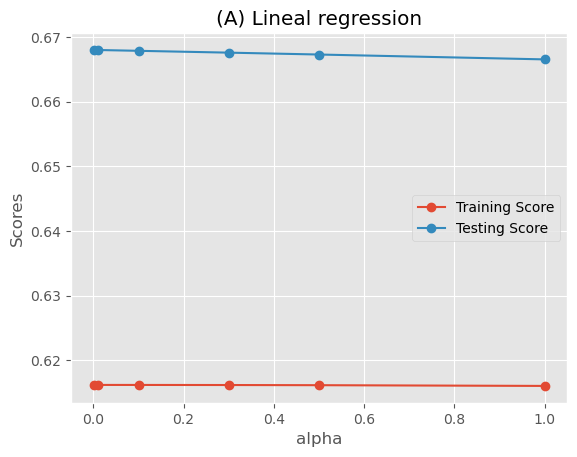

In [111]:
x0 = dfScoresOR['alpha']
y1 = dfScoresOR['Training Score']
y2 = dfScoresOR['Testing Score']
  
# plot lines

plt.plot(x0, y1, label = "Training Score", marker='o')
plt.plot(x0, y2, label = "Testing Score", marker='o')
plt.title("(A) Lineal regression")
plt.xlabel("alpha")
plt.ylabel("Scores")
plt.legend()
plt.grid(True)
plt.show()

## SVM 

In [71]:
print("SVM with kernel = rbf, C = 1 and gamma = auto")
a, b = SVMachine(X_train, X_test, y_train, y_test, True, "rbf", 1, "auto")
dfScores.loc[len(dfScores.index)] = ['SVM', a, b,'kernel = rbf, C = 1 and gamma = auto']
print("\n")
print("SVM with kernel = rbf, C = 25 and gamma = auto")
a, b = SVMachine(X_train, X_test, y_train, y_test, True, "rbf", 25, "auto")
dfScores.loc[len(dfScores.index)] = ['SVM', a, b,'kernel = rbf, C = 25 and gamma = auto']
print("\n")
print("SVM with kernel = rbf, C = 100 and gamma = auto")
a, b = SVMachine(X_train, X_test, y_train, y_test, True, "rbf", 100, "auto")
dfScores.loc[len(dfScores.index)] = ['SVM', a, b,'kernel = rbf, C = 100 and gamma = auto']
print("\n")
print("SVM with kernel = rbf, C = 500 and gamma = auto")
a, b = SVMachine(X_train, X_test, y_train, y_test, True, "rbf", 500, "auto")
dfScores.loc[len(dfScores.index)] = ['SVM', a, b,'kernel = rbf, C = 500 and gamma = auto']
print("\n")
print("SVM with kernel = rbf, C = 1000 and gamma = auto")
a, b = SVMachine(X_train, X_test, y_train, y_test, True, "rbf", 1000, "auto")
dfScores.loc[len(dfScores.index)] = ['SVM', a, b,'kernel = rbf, C = 1000 and gamma = auto']
print ("***************************************")
print("\n")
print("SVM with kernel = linear, C = 1000 and gamma = auto")
a, b = SVMachine(X_train, X_test, y_train, y_test, True, "linear", 1000, "auto")
dfScores.loc[len(dfScores.index)] = ['SVM', a, b,'kernel = linear, C = 1000 and gamma = auto']
print("\n")
print("SVM with kernel = linear, C = 1000 and gamma = auto")
a, b = SVMachine(X_train, X_test, y_train, y_test, True, "linear", 1000, "auto")
dfScores.loc[len(dfScores.index)] = ['SVM', a, b,'kernel = linear C = 1000 and gamma = auto']
print("\n")
print("'kernel = linear, C = 1000 and gamma = scale'")
a, b = SVMachine(X_train, X_test, y_train, y_test, True, "linear", 1000, "scale")
dfScores.loc[len(dfScores.index)] = ['SVM', a, b,'kernel = linear, C = 1000 and gamma = scale']
print("\n")


SVM with kernel = rbf, C = 1 and gamma = auto
Train score=  0.04559565526962128
Test score=  -0.014202313681391576


SVM with kernel = rbf, C = 25 and gamma = auto
Train score=  0.6442587296121358
Test score=  0.5886487027047694


SVM with kernel = rbf, C = 100 and gamma = auto
Train score=  0.8104477985530946
Test score=  0.7652628959154443


SVM with kernel = rbf, C = 500 and gamma = auto
Train score=  0.9239151929003071
Test score=  0.8907065301399693


SVM with kernel = rbf, C = 1000 and gamma = auto
Train score=  0.9511595759156004
Test score=  0.9149950650274387
***************************************


SVM with kernel = linear, C = 1000 and gamma = auto
Train score=  0.5556401792048504
Test score=  0.5794905476318409


SVM with kernel = linear, C = 1000 and gamma = auto
Train score=  0.5556401792048504
Test score=  0.5794905476318409


'kernel = linear, C = 1000 and gamma = scale'
Train score=  0.5556401792048504
Test score=  0.5794905476318409




In [110]:

#Definicion de columnas
columnsSVM = ['Model', 'Training Score', 'Testing Score', 'C']

# Creacion del Data Frame vacio
dfScoresSVM= pd.DataFrame(columns = columnsSVM)


CCC= [10, 25, 100, 500, 1000, 5000, 10000]

for j in CCC:
  #Se usa la misma funcion utilizada anteriormente para KNN KNeighbors Regressor
  print ("c=", j)
  a, b = SVMachine(X_train, X_test, y_train, y_test, True, "rbf", j, "auto")
  dfScoresSVM.loc[len(dfScoresSVM.index)] = ['SVM', a, b,j]
display(dfScoresSVM)

c= 10
Train score=  0.46513811875974187
Test score=  0.40930831834813397
c= 25
Train score=  0.6442587296121358
Test score=  0.5886487027047694
c= 100
Train score=  0.8104477985530946
Test score=  0.7652628959154443
c= 500
Train score=  0.9239151929003071
Test score=  0.8907065301399693
c= 1000
Train score=  0.9511595759156004
Test score=  0.9149950650274387
c= 5000
Train score=  0.9868724079255539
Test score=  0.9524298201243903
c= 10000
Train score=  0.9901068518510254
Test score=  0.9609354239393727


,Model,Training Score,Testing Score,C
0,SVM,0.465138,0.409308,10
1,SVM,0.644259,0.588649,25
2,SVM,0.810448,0.765263,100
3,SVM,0.923915,0.890707,500
4,SVM,0.951160,0.914995,1000
5,SVM,0.986872,0.952430,5000
6,SVM,0.990107,0.960935,10000


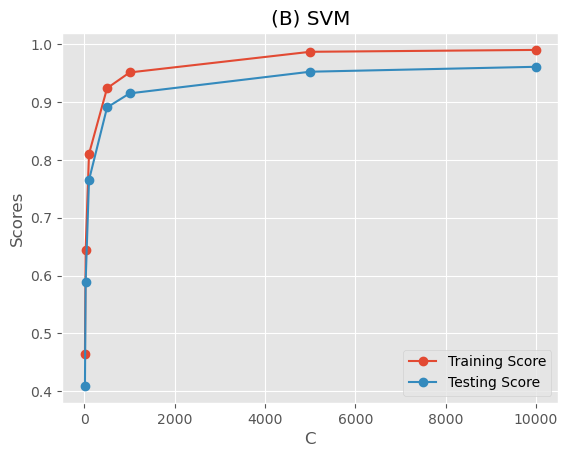

In [109]:
x0 = dfScoresSVM['C']
y1 = dfScoresSVM['Training Score']
y2 = dfScoresSVM['Testing Score']
  
# plot lines
plt.plot(x0, y1, label = "Training Score", marker='o')
plt.plot(x0, y2, label = "Testing Score", marker='o')
plt.title("(B) SVM")
plt.xlabel("C")
plt.ylabel("Scores")
plt.legend()
plt.grid(True)
plt.show()

## KNN Neighbors

In [74]:
#Uso de la funcion kNNRegression con visualizacion de Scores, definicion de neighbors, weights y algorithm

#kNNRegression(X_train, X_test, y_train, y_test, showScore, n, weights, algorithm)
#n: Number of neighbors to use
#weights = 'uniform', assigns equal weights to all points. 
#weights = 'distance' assigns weights proportional to the inverse of the distance from the query point
#algorithm{‘auto’, ‘ball_tree’, ‘kd_tree’, ‘brute’}, default=’auto’
#Algorithm used to compute the nearest neighbors

print("KNN regression with neighbors = 1, weights = uniform and  algorithm = auto")
a, b = kNNRegression(X_train, X_test, y_train, y_test, True, 1, "uniform", "auto")
dfScores.loc[len(dfScores.index)] = ['KNN', a, b,'neighbors = 1, weights = uniform and  algorithm = auto']
print("\n")

print("KNN regression with neighbors = 3, weights = uniform and  algorithm = auto")
a, b = kNNRegression(X_train, X_test, y_train, y_test, True, 3, "uniform", "auto")
dfScores.loc[len(dfScores.index)] = ['KNN', a, b,'neighbors = 3, weights = uniform and  algorithm = auto']
print("\n")

print("KNN regression with neighbors = 5, weights = uniform and  algorithm = auto")
a, b = kNNRegression(X_train, X_test, y_train, y_test, True, 5, "uniform", "auto")
dfScores.loc[len(dfScores.index)] = ['KNN', a, b,'neighbors = 5, weights = uniform and  algorithm = auto']
print("\n")

print("KNN regression with neighbors = 10, weights = uniform and  algorithm = auto")
a, b = kNNRegression(X_train, X_test, y_train, y_test, True, 10, "uniform", "auto")
dfScores.loc[len(dfScores.index)] = ['KNN', a, b,'neighbors = 10, weights = uniform and  algorithm = auto']
print("\n")

print("KNN regression with neighbors = 4, weights = distance and  algorithm = distance")
a, b = kNNRegression(X_train, X_test, y_train, y_test, True, 3, "distance", "auto")
dfScores.loc[len(dfScores.index)] = ['KNN', a, b,'neighbors = 3, weights = distance and  algorithm = auto']
print("\n")


KNN regression with neighbors = 1, weights = uniform and  algorithm = auto
Train score=  1.0
Test score=  0.8060302917224912


KNN regression with neighbors = 3, weights = uniform and  algorithm = auto
Train score=  0.9400386987779432
Test score=  0.7978178034349679


KNN regression with neighbors = 5, weights = uniform and  algorithm = auto
Train score=  0.8625246472318663
Test score=  0.7406054331739294


KNN regression with neighbors = 10, weights = uniform and  algorithm = auto
Train score=  0.6556114513267322
Test score=  0.5378998876184771


KNN regression with neighbors = 4, weights = distance and  algorithm = distance
Train score=  1.0
Test score=  0.8286391714233847




In [75]:
#Definicion de columnas
columnsKNN = ['Model', 'Training Score', 'Testing Score', 'Neighbors']

# Creacion del Data Frame vacio
dfScoresKNN = pd.DataFrame(columns = columnsKNN)

Neighbors = [1, 2, 3, 4, 8, 10]

for j in Neighbors:
  #Se usa la misma funcion utilizada anteriormente para KNN KNeighbors Regressor
  a, b = kNNRegression(X_train, X_test, y_train, y_test, False, j, "uniform", "auto")
  dfScoresKNN.loc[len(dfScoresKNN.index)] = ['KNN', a, b,j]
display(dfScoresKNN)


,Model,Training Score,Testing Score,Neighbors
0,KNN,1.000000,0.806030,1
1,KNN,0.958241,0.828032,2
2,KNN,0.940039,0.797818,3
3,KNN,0.903655,0.778295,4
4,KNN,0.741017,0.614992,8
5,KNN,0.655611,0.537900,10


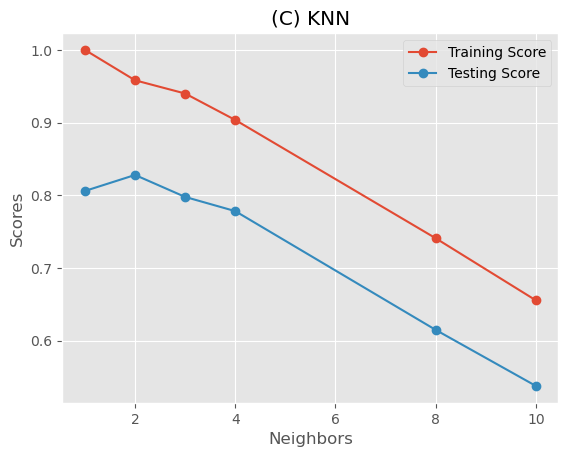

In [108]:

x0 = dfScoresKNN['Neighbors']
y1 = dfScoresKNN['Training Score']
y2 = dfScoresKNN['Testing Score']
  
# plot lines
plt.plot(x0, y1, label = "Training Score", marker='o')
plt.plot(x0, y2, label = "Testing Score", marker='o')
plt.title("(C) KNN")
plt.xlabel("Neighbors")
plt.ylabel("Scores")
plt.legend()
plt.grid(True)
plt.show()

### Gaussian Processes Regressor

In [107]:
from sklearn.datasets import make_friedman2
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel

def G_P_R (X_train, y_train,X_test, y_test,n_targets=0):
    kernel = DotProduct() + WhiteKernel()
    gpr = GaussianProcessRegressor(kernel=kernel,n_targets=n_targets).fit(X_train, y_train)
    trainScore=gpr.score(X_train, y_train)
    testScore=gpr.score(X_test, y_test)
    return trainScore, testScore

#Definicion de columnas
columnsGPR = ['Model', 'Training Score', 'Testing Score', 'alpha']

# Creacion del Data Frame vacio
dfScoresGPR = pd.DataFrame(columns = columnsGPR)


n_restarts_optimizer= [0,1,5,10,100]

for j in n_restarts_optimizer:
  kernel = DotProduct() + WhiteKernel()
  gpr = GaussianProcessRegressor(kernel=kernel,n_restarts_optimizer=j).fit(X_train, y_train)
  trainScore=gpr.score(X_train, y_train)
  testScore=gpr.score(X_test, y_test)
  
  dfScoresGPR.loc[len(dfScoresGPR.index)] = ['KNN', trainScore, testScore,j]
display(dfScoresGPR)


,Model,Training Score,Testing Score,alpha
0,KNN,0.350845,0.351478,0
1,KNN,0.350845,0.351478,1
2,KNN,0.350844,0.351477,5
3,KNN,0.350844,0.351477,10
4,KNN,0.350844,0.351477,100


## Random Forest


In [81]:
print("Random Forest  with n_estimators = 10, criterion = squared_error and max_depth = None")
a, b = RFRegressor (X_train, X_test, y_train, y_test, True, False, 10, "squared_error", None)
dfScores.loc[len(dfScores.index)] = ['Random Forest', a, b,'n_estimators = 10, criterion = squared_error and max_depth = None']
print("\n")


print("Random Forest  with n_estimators = 100, criterion = squared_error and max_depth = None")
a, b = RFRegressor (X_train, X_test, y_train, y_test, True, False, 100, "squared_error", None)
dfScores.loc[len(dfScores.index)] = ['Random Forest', a, b,'n_estimators = 10,0 criterion = squared_error and max_depth = None']
print("\n")

print("Random Forest  with n_estimators = 100, criterion = squared_error and max_depth = 10")
a, b = RFRegressor (X_train, X_test, y_train, y_test, True, False, 100, "squared_error", 10)
dfScores.loc[len(dfScores.index)] = ['Random Forest', a, b,'n_estimators = 10,0 criterion = squared_error and max_depth = 10']
print("\n")


print("Random Forest  with n_estimators = 10, criterion = squared_error and max_depth = 5")
a, b = RFRegressor (X_train, X_test, y_train, y_test, True, False, 10, "squared_error", 5)
dfScores.loc[len(dfScores.index)] = ['Random Forest', a, b,'n_estimators = 10, criterion = squared_error and max_depth = 5']
print("\n")

print("Random Forest  with n_estimators = 10, criterion = absolute_error and max_depth = None")
a, b = RFRegressor (X_train, X_test, y_train, y_test, True, False, 10, "absolute_error", None)
dfScores.loc[len(dfScores.index)] = ['Random Forest', a, b,'n_estimators = 10, criterion = absolute_error and max_depth = None']
print("\n")

print("Random Forest  with n_estimators = 10, criterion = poisson and max_depth = None")
a, b = RFRegressor (X_train, X_test, y_train, y_test, True, False, 10, "poisson", None)
dfScores.loc[len(dfScores.index)] = ['Random Forest', a, b,'n_estimators = 10, criterion = poisson and max_depth = None']
print("\n")

Random Forest  with n_estimators = 10, criterion = squared_error and max_depth = None
Train score=  0.989721213177935
Test score=  0.9441781438886466


Random Forest  with n_estimators = 100, criterion = squared_error and max_depth = None
Train score=  0.9950238622665482
Test score=  0.9529046431269617


Random Forest  with n_estimators = 100, criterion = squared_error and max_depth = 10
Train score=  0.9942524689085863
Test score=  0.9542464650751136


Random Forest  with n_estimators = 10, criterion = squared_error and max_depth = 5
Train score=  0.9594222775001584
Test score=  0.9143865991807447


Random Forest  with n_estimators = 10, criterion = absolute_error and max_depth = None
Train score=  0.992172008077549
Test score=  0.9425149513539655


Random Forest  with n_estimators = 10, criterion = poisson and max_depth = None
Train score=  0.9916946455763233
Test score=  0.9464512846709704




In [82]:
#Definicion de columnas
columnsRF = ['Model', 'Training Score', 'Testing Score', 'n']

# Creacion del Data Frame vacio
dfScoresRF = pd.DataFrame(columns = columnsRF)

nnn = [1, 2, 3, 4, 8, 10,20,50,100]

for j in nnn:
  #Se usa la misma funcion utilizada anteriormente para KNN KNeighbors Regressor
  a, b = RFRegressor (X_train, X_test, y_train, y_test, True, False, j, "squared_error", None)
  dfScoresRF.loc[len(dfScoresRF.index)] = ['n', a, b,j]
display(dfScoresRF)

Train score=  0.9638162505593364
Test score=  0.8908656109449622
Train score=  0.9730697714352656
Test score=  0.9168577038111273
Train score=  0.9844744218445247
Test score=  0.9264481873849727
Train score=  0.986550946481778
Test score=  0.9303006846077244
Train score=  0.9899403801965436
Test score=  0.9563189110637252
Train score=  0.9901474011313647
Test score=  0.9428219686595065
Train score=  0.9942016583959461
Test score=  0.9624485137394393
Train score=  0.9939539631062917
Test score=  0.9562360650507588
Train score=  0.994442324858319
Test score=  0.9559077297835561


,Model,Training Score,Testing Score,n
0,n,0.963816,0.890866,1
1,n,0.973070,0.916858,2
2,n,0.984474,0.926448,3
3,n,0.986551,0.930301,4
4,n,0.989940,0.956319,8
5,n,0.990147,0.942822,10
6,n,0.994202,0.962449,20
7,n,0.993954,0.956236,50
8,n,0.994442,0.955908,100


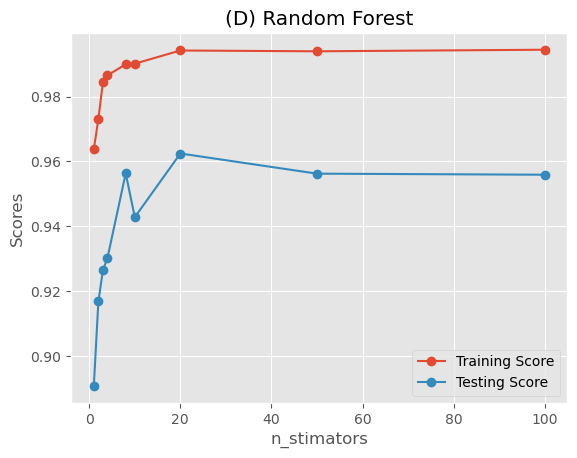

In [112]:
x0 = dfScoresRF['n']
y1 = dfScoresRF['Training Score']
y2 = dfScoresRF['Testing Score']
  
# plot lines
plt.plot(x0, y1, label = "Training Score", marker='o')
plt.plot(x0, y2, label = "Testing Score", marker='o')
plt.title("(D) Random Forest")
plt.xlabel("n_stimators")
plt.ylabel("Scores")
plt.legend()
plt.show()

Decision Tree Regression - importances features


Train score=  0.9950147810425849
Test score=  0.9545970258052154
Showing importances features classification:


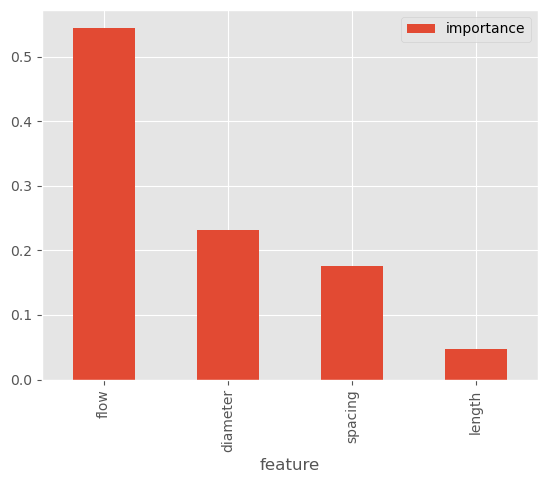

In [84]:
print("Decision Tree Regression - importances features")
a, b = RFRegressor (X_train, X_test, y_train, y_test, True, True, 100, "squared_error", None)

## Desicion tree

In [85]:
print("Desicion Tree Regressor , criterion = squared_error and max_depth = None")
a, b = DTRegressor (X_train, X_test, y_train, y_test, True,False, "squared_error", None)
dfScores.loc[len(dfScores.index)] = ['Desicion Tree', a, b,'criterion = squared_error and max_depth = None']
print("\n")

print("Desicion Tree Regressor , criterion = squared_error and max_depth = 1")
a, b = DTRegressor (X_train, X_test, y_train, y_test, True,False, "squared_error",1)
dfScores.loc[len(dfScores.index)] = ['Desicion Tree', a, b,'criterion = squared_error and max_depth = 1']
print("\n")

print("Desicion Tree Regressor , criterion = squared_error and max_depth = 3")
a, b = DTRegressor (X_train, X_test, y_train, y_test, True,False, "squared_error", 3)
dfScores.loc[len(dfScores.index)] = ['Desicion Tree', a, b,'criterion = squared_error and max_depth = 3']
print("\n")

print("Desicion Tree Regressor , criterion = squared_error and max_depth = 10")
a, b = DTRegressor (X_train, X_test, y_train, y_test, True,False, "squared_error", 10)
dfScores.loc[len(dfScores.index)] = ['Desicion Tree', a, b,'criterion = squared_error and max_depth = 10']
print("\n")


print("Desicion Tree Regressor , criterion = squared_error and max_depth = 20")
a, b = DTRegressor (X_train, X_test, y_train, y_test, True,False, "squared_error", 20)
dfScores.loc[len(dfScores.index)] = ['Desicion Tree', a, b,'criterion = squared_error and max_depth = 20']
print("\n")


Desicion Tree Regressor , criterion = squared_error and max_depth = None
Train score=  1.0
Test score=  0.9165692827921552


Desicion Tree Regressor , criterion = squared_error and max_depth = 1
Train score=  0.36794966289860775
Test score=  0.26581546851599147


Desicion Tree Regressor , criterion = squared_error and max_depth = 3
Train score=  0.788081836412329
Test score=  0.7342646342698882


Desicion Tree Regressor , criterion = squared_error and max_depth = 10
Train score=  0.9995918086657924
Test score=  0.9147405118523546


Desicion Tree Regressor , criterion = squared_error and max_depth = 20
Train score=  1.0
Test score=  0.903920187852065




In [86]:
#Definicion de columnas
columnsDT = ['Model', 'Training Score', 'Testing Score', 'Max_Depth']

# Creacion del Data Frame vacio
dfScoresDT = pd.DataFrame(columns = columnsDT)


depths = [1, 2, 3, 4, 8, 10,12,15,20,50]

for j in depths:
  #Se usa la misma funcion utilizada anteriormente para KNN KNeighbors Regressor
  print ("depth =", j)
  
  a, b = DTRegressor (X_train, X_test, y_train, y_test, True, False, "squared_error", j)
  dfScoresDT.loc[len(dfScoresDT.index)] = ['Desicion tree', a, b,j]
display(dfScoresDT)

depth = 1
Train score=  0.36794966289860775
Test score=  0.26581546851599147
depth = 2
Train score=  0.6573827232595186
Test score=  0.5430583840441787
depth = 3
Train score=  0.788081836412329
Test score=  0.7342646342698882
depth = 4
Train score=  0.8927054673764082
Test score=  0.8263553225839335
depth = 8
Train score=  0.9924212434187623
Test score=  0.8968910988757921
depth = 10
Train score=  0.9995918086657924
Test score=  0.9134929211230579
depth = 12
Train score=  0.9999726388298253
Test score=  0.9167060114406181
depth = 15
Train score=  1.0
Test score=  0.9118637968775102
depth = 20
Train score=  1.0
Test score=  0.9006138450282988
depth = 50
Train score=  1.0
Test score=  0.9319931642983089


,Model,Training Score,Testing Score,Max_Depth
0,Desicion tree,0.367950,0.265815,1
1,Desicion tree,0.657383,0.543058,2
2,Desicion tree,0.788082,0.734265,3
3,Desicion tree,0.892705,0.826355,4
4,Desicion tree,0.992421,0.896891,8
5,Desicion tree,0.999592,0.913493,10
6,Desicion tree,0.999973,0.916706,12
7,Desicion tree,1.000000,0.911864,15
8,Desicion tree,1.000000,0.900614,20
9,Desicion tree,1.000000,0.931993,50


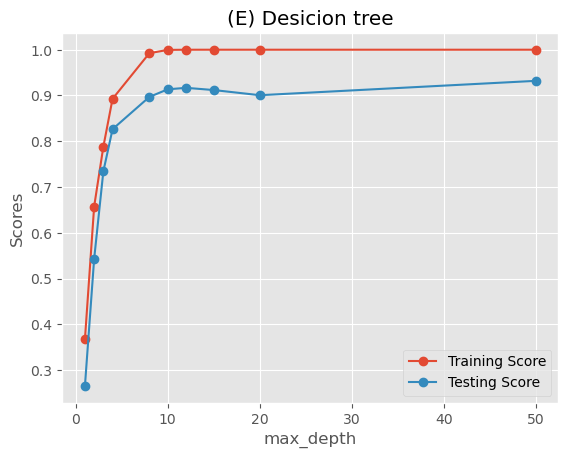

In [87]:
x0 = dfScoresDT['Max_Depth']
y1 = dfScoresDT['Training Score']
y2 = dfScoresDT['Testing Score']
  
# plot lines
plt.plot(x0, y1, label = "Training Score", marker='o')
plt.plot(x0, y2, label = "Testing Score", marker='o')
plt.title("(E) Desicion tree")
plt.xlabel("max_depth")
plt.ylabel("Scores")
plt.legend()
plt.show()

Metodo de Emsamble
Voting Regressor

In [88]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import VotingRegressor

# Training classifiers
reg1 = GradientBoostingRegressor(random_state=10)
reg2 = RandomForestRegressor(random_state=10,n_estimators=3)
reg3 = LinearRegression()
ereg = VotingRegressor(estimators=[('gb', reg1), ('rf', reg2), ('lr', reg3)])
ereg = ereg.fit(X_train, y_train)


In [89]:
a = ereg.score(X_train,y_train)
b = ereg.score(X_test,y_test)
print("Train score= ", a)
print("Test score= ", b)
dfScores.loc[len(dfScores.index)] = ['VotingRegressor', a, b,'E methods used']

Train score=  0.9486315771949831
Test score=  0.9335967751883301


In [90]:
#Definicion de columnas
columnsV = ['Model', 'Training Score', 'Testing Score', 'Max_Depth']

# Creacion del Data Frame vacio
dfScoresV = pd.DataFrame(columns = columnsDT)


depths = [1, 2, 3, 4, 8, 10,12,15,20,50]

for j in depths:
  #Se usa la misma funcion utilizada anteriormente para KNN KNeighbors Regressor
  print ("depth =", j)
  
  a, b = DTRegressor (X_train, X_test, y_train, y_test, True, False, "squared_error", j)
  dfScoresDT.loc[len(dfScoresDT.index)] = ['Desicion tree', a, b,j]
display(dfScoresDT)

depth = 1
Train score=  0.36794966289860775
Test score=  0.26581546851599147
depth = 2
Train score=  0.6573827232595186
Test score=  0.5430583840441787
depth = 3
Train score=  0.788081836412329
Test score=  0.7342646342698882
depth = 4
Train score=  0.8927054673764082
Test score=  0.8263553225839335
depth = 8
Train score=  0.9924212434187623
Test score=  0.923944248030618
depth = 10
Train score=  0.9995918086657924
Test score=  0.9049557528340811
depth = 12
Train score=  0.9999726388298253
Test score=  0.9144475884083528
depth = 15
Train score=  1.0
Test score=  0.9035596634262993
depth = 20
Train score=  1.0
Test score=  0.9049240834543995
depth = 50
Train score=  1.0
Test score=  0.9047015509263808


,Model,Training Score,Testing Score,Max_Depth
0,Desicion tree,0.367950,0.265815,1
1,Desicion tree,0.657383,0.543058,2
2,Desicion tree,0.788082,0.734265,3
3,Desicion tree,0.892705,0.826355,4
4,Desicion tree,0.992421,0.896891,8
5,Desicion tree,0.999592,0.913493,10
6,Desicion tree,0.999973,0.916706,12
7,Desicion tree,1.000000,0.911864,15
8,Desicion tree,1.000000,0.900614,20
9,Desicion tree,1.000000,0.931993,50


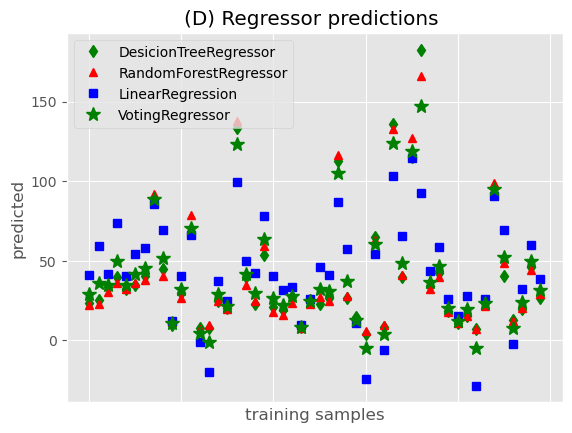

In [115]:
reg1.fit(X_train,y_train)
reg2.fit(X_train,y_train)
reg3.fit(X_train,y_train)

xt = X_train[:50]
#yt=y_train[50]

pred1 = reg1.predict(xt)
pred2 = reg2.predict(xt)
pred3 = reg3.predict(xt)
pred4 = ereg.predict(xt)

plt.figure()
#plt.plot(yt,"r+",label="train")
plt.plot(pred1, "gd", label="DesicionTreeRegressor")
plt.plot(pred2, "r^", label="RandomForestRegressor")
plt.plot(pred3, "bs", label="LinearRegression")
plt.plot(pred4, "g*", ms=10, label="VotingRegressor")

plt.tick_params(axis="x", which="both", bottom=False, top=False, labelbottom=False)
plt.ylabel("predicted")
plt.xlabel("training samples")
plt.legend(loc="best")
plt.title("(D) Regressor predictions ")

plt.show()

# Convolutional Neural Network

In [92]:
from tensorflow import keras
#from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from sklearn.metrics import mean_squared_error



ModuleNotFoundError: No module named 'tensorflow'

In [ ]:

X_train_np = np.array(X_train)
X_test_np = np.array(X_test)
y_train_np = np.array(y_train)
y_test_np = np.array(y_test)
print('x_train shape:', X_train_np.shape)
print('x_test shape:', X_test_np.shape)
print('y_train shape:', y_train_np.shape)
print('y_test shape:', y_test_np.shape)

In [ ]:
# Building the model

model = Sequential()

model.add(Dense(128, input_dim=4))
model.add(Activation('relu'))

model.add(Dense(64))
model.add(Activation('relu'))

model.add(Dense(32))
model.add(Activation('relu'))

model.add(Dense(1))
model.add(Activation('sigmoid'))

# Compiling the model
model.compile(loss = 'mean_squared_error', optimizer='adam', metrics=['accuracy'])

model.summary()

In [ ]:
def ANN_Training_Evaluate(X_train_np, y_train_np, X_test_np, y_test_np, temp_epoch, temp_size, dfScores, verification = False):
  # Training the model
  model.fit(X_train_np, y_train_np, epochs=temp_epoch, batch_size=temp_size, verbose=0)
  # Evaluating the model on the training and testing set
  a = model.evaluate(X_train_np, y_train_np)  
  b = model.evaluate(X_test_np, y_test_np)  
  if verification:
    print("\n Training Accuracy:", a[1])
    print("\n Testing Accuracy:", b[1])
  
  return a[1], b[1]

In [ ]:
#Several training and evaluation with different hyper-parameters
a, b = ANN_Training_Evaluate(X_train_np, y_train_np, X_test_np, y_test_np, 200, 200, dfScores, False)
#dfScores = dfScores.append({'Model': "ANN", 'Training Score' : a, 'Testing Score' : b, 'Details': "ANN-128-64-32-1 with epochs=200 batch_size= 200"}, ignore_index = True)
print("\n")
a, b = ANN_Training_Evaluate(X_train_np, y_train_np, X_test_np, y_test_np, 400, 250, dfScores, False)
#dfScores = dfScores.append({'Model': "ANN", 'Training Score' : a, 'Testing Score' : b, 'Details': "ANN-128-64-32-1 with epochs=400 batch_size= 250"}, ignore_index = True)
print("\n")
a, b = ANN_Training_Evaluate(X_train_np, y_train_np, X_test_np, y_test_np, 600, 250, dfScores, False)
#dfScores = dfScores.append({'Model': "ANN", 'Training Score' : a, 'Testing Score' : b, 'Details': "ANN-128-64-32-1 with epochs=600 batch_size= 250"}, ignore_index = True)
print("\n")
a, b = ANN_Training_Evaluate(X_train_np, y_train_np, X_test_np, y_test_np, 800, 250, dfScores, False)
#dfScores = dfScores.append({'Model': "ANN", 'Training Score' : a, 'Testing Score' : b, 'Details': "ANN-128-64-32-1 with epochs=800 batch_size= 250"}, ignore_index = True)


# Opcion 2


In [ ]:
def build_and_compile_model(norm):
  model = keras.Sequential([
      norm,
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(1)
  ])

  model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001))
  return model

In [ ]:
horsepower_normalizer = layers.Normalization(input_shape=[1,], axis=None)
horsepower_normalizer.adapt(horsepower)
dnn_model = build_and_compile_model(horsepower_normalizer)

## Summary 

In [ ]:
#from google.colab import data_table
#data_table.enable_dataframe_formatter()

#Desplegar tabla resumen de resultados
print("Scores Summary Table")
display(dfScores)
print("=========================================================================================================")
print("Highest Training Score:")
tempMaxScore = dfScores['Training Score'].max()
display(dfScores[dfScores['Training Score'] == tempMaxScore])
print("=========================================================================================================")
print("Highest Testing Score:")
tempMaxScore = dfScores['Testing Score'].max()
display(dfScores[dfScores['Testing Score'] == tempMaxScore])
